    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320L: Research Proposal Group 3 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">James Song, Carlye Pathman, Lynn Suh and Jesus Merida</h2>


In [2]:
# Script name: Econ320Lab_ResearchProposal_group3.ipynb
# Purpose of script: Submission of Reserach Proposal for ECON320L with Professor Paloma Lopez de mesa Moyano
# Author: James Song, Carlye Pathman, Lynn Suh and Jesus Merida
# Date Created: October 24th 2022
# --------------------------
# Notes: NA
# ---------------------------

## Package setup

In [3]:
import math
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

import numpy as np
import statsmodels.formula.api as smf
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## I. Introduction and motivation: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; With the rise in computer science and the use of coding across fields, it is becoming very common to have some level of experience with coding as a required skill for hiring. It’s becoming such a desirable skill that colleges are even beginning to incorporate coding practice and application across majors in their required core classes. For this study, we are choosing to investigate if there is a valid linear model that illustrates the relationship between certain characteristics/qualifications of employees and their total compensation within fields that require programming. If a valid model can be uncovered, the information within it would be especially useful to potential and existing workers for jobs requiring programming to determine how best to maximize income. 

## II. Data: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data being used in this study comes from Stack Overflow’s annual developer survey from 2022. The survey is cross-sectional with 73,268 software developer respondents from 180 different countries. It is important to note that because of sanctions on US transport/export, the Stack Overflow survey was essentially inaccessible to respondents from countries such as Cuba, Iran, Syria, and North Korea. Participants could submit their responses through various avenues including social media posts, blog posts, onsite messaging, email lists, and banner ads. However, we could not use all 73,268 observations because we only about half of respondents (38,071) provided an answer to the total compensation question as it was not a required response.

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Coursework\22_fall\ECON_309\Data\sof_data\survey_results_public.csv")
print(f"total responses: {len(df)}")
df.head()

total responses: 73268


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Furthermore, there are many underlying factors that affect total compensation when viewed globally, such as difference in average living cost and difference in minimum wage, we decided to only look at the responses from __full-time professionals located in the US only__. 

In [5]:
professional_df = df[df['MainBranch']==df['MainBranch'][1]] # those who are only "I am a developer by profession"
professional_df = professional_df[professional_df['Employment']==professional_df['Employment'][1]] # those who are only full-time employyes
us_prof_df = professional_df[professional_df['Country'] == "United States of America"] # only USA, to deal with minimum wage/living cost differences around the world. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Even after reducing our scope to only US full-time professionals, we still had to wrangle with the data. Since this dataset was through a survey, many responses that could have been collected as quantitative fields were collected as qualitative fields. In order to utilize these responses, we converted the qualitative data into quantitative data. For example, education level was converted to education years, the list of programming languages one was proficient in was converted into number of programming languages one was proficient in and so on. 

In [6]:
us_prof_df = us_prof_df.fillna("***") # filling na values with a distinct string
#getting rid of rows with missing dependent variable
us_prof_comp_data = us_prof_df[us_prof_df['ConvertedCompYearly']!="***"]

In [7]:
e_level =us_prof_comp_data['EdLevel'].unique().tolist() # coverting education level
e_level_list = [16, 18, 14, 13, 12, 22, 22, 12, 6] # corresponnding education years 
e_level_dict = dict(zip(e_level, e_level_list)) # create a dictionary
us_prof_comp_data['EdLevel_converted']= us_prof_comp_data['EdLevel'].apply(lambda x: e_level_dict.get(x)) # creating a new column of converted education years.

In [8]:
us_prof_comp_data = us_prof_comp_data[us_prof_comp_data['YearsCodePro'] != "***"] # getting rid of those who did not specificy years of coding
# converting string responses to fit the rest of the data in this column
us_prof_comp_data['YearsCodeProAdjusted'] = [0.5 if val == "Less than 1 year" else 55.0 if val == "More than 50 years" else float(val) for val in us_prof_comp_data['YearsCodePro']]

In [9]:
# converting other qualitative variables to quantitative
cols_to_change = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "MiscTechHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "NEWCollabToolsHaveWorkedWith",
]
for col in cols_to_change:
    new_col_name = col[: col.find("HaveWorked")] + "Count"
    us_prof_comp_data[new_col_name] = us_prof_comp_data[col].apply(
        lambda x: 0 if x == "***" else len(x.split(";"))
    )  # parsing the list of programming languages/platforms/webframes etc, to get a count
# combining PlatformCount, WebframeCount, MiscTechCount, ToolsTechCount, NEWCollabToolsCount
us_prof_comp_data["framelibsCount"] = (
    us_prof_comp_data["PlatformCount"]
    + us_prof_comp_data["WebframeCount"]
    + us_prof_comp_data["MiscTechCount"]
    + us_prof_comp_data["ToolsTechCount"]
    + us_prof_comp_data["NEWCollabToolsCount"]
)  # combining "less" important techonological skills


In [10]:
# converting OrgSize into quantitative variable
# checking what unique values this column has
set(us_prof_comp_data['OrgSize'])

{'***',
 '1,000 to 4,999 employees',
 '10 to 19 employees',
 '10,000 or more employees',
 '100 to 499 employees',
 '2 to 9 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 'I don’t know',
 'Just me - I am a freelancer, sole proprietor, etc.'}

In [11]:
new_orgsize = []
# below for loop saves the rounded average between the two numbers 
# in above response fields as a quantitative Organization Size.

for orgsize in us_prof_comp_data['OrgSize']:
    if orgsize == "***" or orgsize == "I don’t know" or orgsize == "Just me - I am a freelancer, sole proprietor, etc.":
        size == "***" # un-necessary data -> same as na values
    else:
        split_space = orgsize.split(" ") # splitting by space -> returns a list of strings
        min_size = split_space[0] # getting the 1st index, the 2, 10, 20, 100, and so on
        if orgsize == "10,000 or more employees": # if more than 10k employees
            size = (10_000+ 20_000 )/2 # set as 15_000
        else:
            max_size = split_space[2] # getting the 2nd index, the 9, 19, 99, 499, and so on
            if min_size.find(",") != -1:
                min_size = min_size.replace(",", "") # removing the comma to convert to int
            if max_size.find(",") != -1:
                max_size = max_size.replace(",", "") # removing the comma to conv
            min_size = int(min_size)
            max_size = int(max_size)
            size = (min_size+max_size)/2 # return the average
    new_orgsize.append(int(size))
us_prof_comp_data['NewOrgSize'] = new_orgsize

In [12]:
print(set(us_prof_comp_data['LanguageCount'])) 
# clearly no one can be a professional developer without knowing any coding languages, this is most likely a survey error so we will remove these values. 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27}


In [13]:
us_prof_comp_data = us_prof_comp_data[us_prof_comp_data['LanguageCount'] != 0] 

In [14]:
small_comps = list(filter(lambda c: len(str(int(c))) < 5, us_prof_comp_data['ConvertedCompYearly'].tolist()))
print(small_comps)
# these values seem to be outliers / errors from the survey 
# as any professional min wage job would make around $15,000
# so we wll remove them by converting them to 0s and removing the 0 rows.

[145.0, 260.0, 94.0, 215.0, 4260.0, 140.0, 180.0, 5000.0, 90.0, 220.0, 5232.0, 6000.0, 381.0, 260.0, 150.0, 290.0, 6000.0, 9500.0, 140.0, 210.0, 135.0, 49.0, 155.0, 230.0, 300.0]


In [15]:
us_prof_comp_data['ConvertedCompYearly'] = us_prof_comp_data['ConvertedCompYearly'].astype('float64')
us_prof_comp_data['ConvertedCompYearly'] = us_prof_comp_data['ConvertedCompYearly'].apply(lambda x: 0 if len(str(int(x))) <5 else x)
us_prof_comp_data = us_prof_comp_data[us_prof_comp_data['ConvertedCompYearly']!=0] 
# removing outliers in the dependent variable.
us_prof_comp_data = us_prof_comp_data[(np.abs(stats.zscore(us_prof_comp_data['ConvertedCompYearly'])) < 3)]
# https://www.bls.gov/oes/current/oes151251.htm considering the table of Percentile wage estimates for Computer Programmers from this website
# we can see that the 10% = $ 47,560 and the 25% $ 62,840. 
# Although they haven't provided us with an exact minimum, 
# it would be safe to assume that anything below $30,000 can be logically considered as an outlier. 
us_prof_comp_data = us_prof_comp_data[us_prof_comp_data['ConvertedCompYearly'] >= 30000.0]


In [16]:
us_prof_comp_data_mod1 = us_prof_comp_data[['ConvertedCompYearly', 'EdLevel_converted', 'YearsCodeProAdjusted', 'LanguageCount', 'framelibsCount', 'NewOrgSize']]

Upon removal of unnecessary responses, missing responses and outliers, the dataset was reduced to 6,943 observations for analysis. 

In [17]:
us_prof_comp_data_mod1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6943 entries, 12 to 73119
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ConvertedCompYearly   6943 non-null   float64
 1   EdLevel_converted     6943 non-null   int64  
 2   YearsCodeProAdjusted  6943 non-null   float64
 3   LanguageCount         6943 non-null   int64  
 4   framelibsCount        6943 non-null   int64  
 5   NewOrgSize            6943 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 379.7 KB


After running some descriptive statistics, the following was found: 
- the average annual compensation was around 217,000 USD
- the average education level was about 16 years
- the average number of years spent coding was around 11 
- the average number of proficient coding languages was around 5 
- the average size of the organization the developers work at is about 4,330 employees 
- the average number of dataframes, libraries and other tools worked with was around 10. 

See the following tables and graphs for more descriptive statistics. 

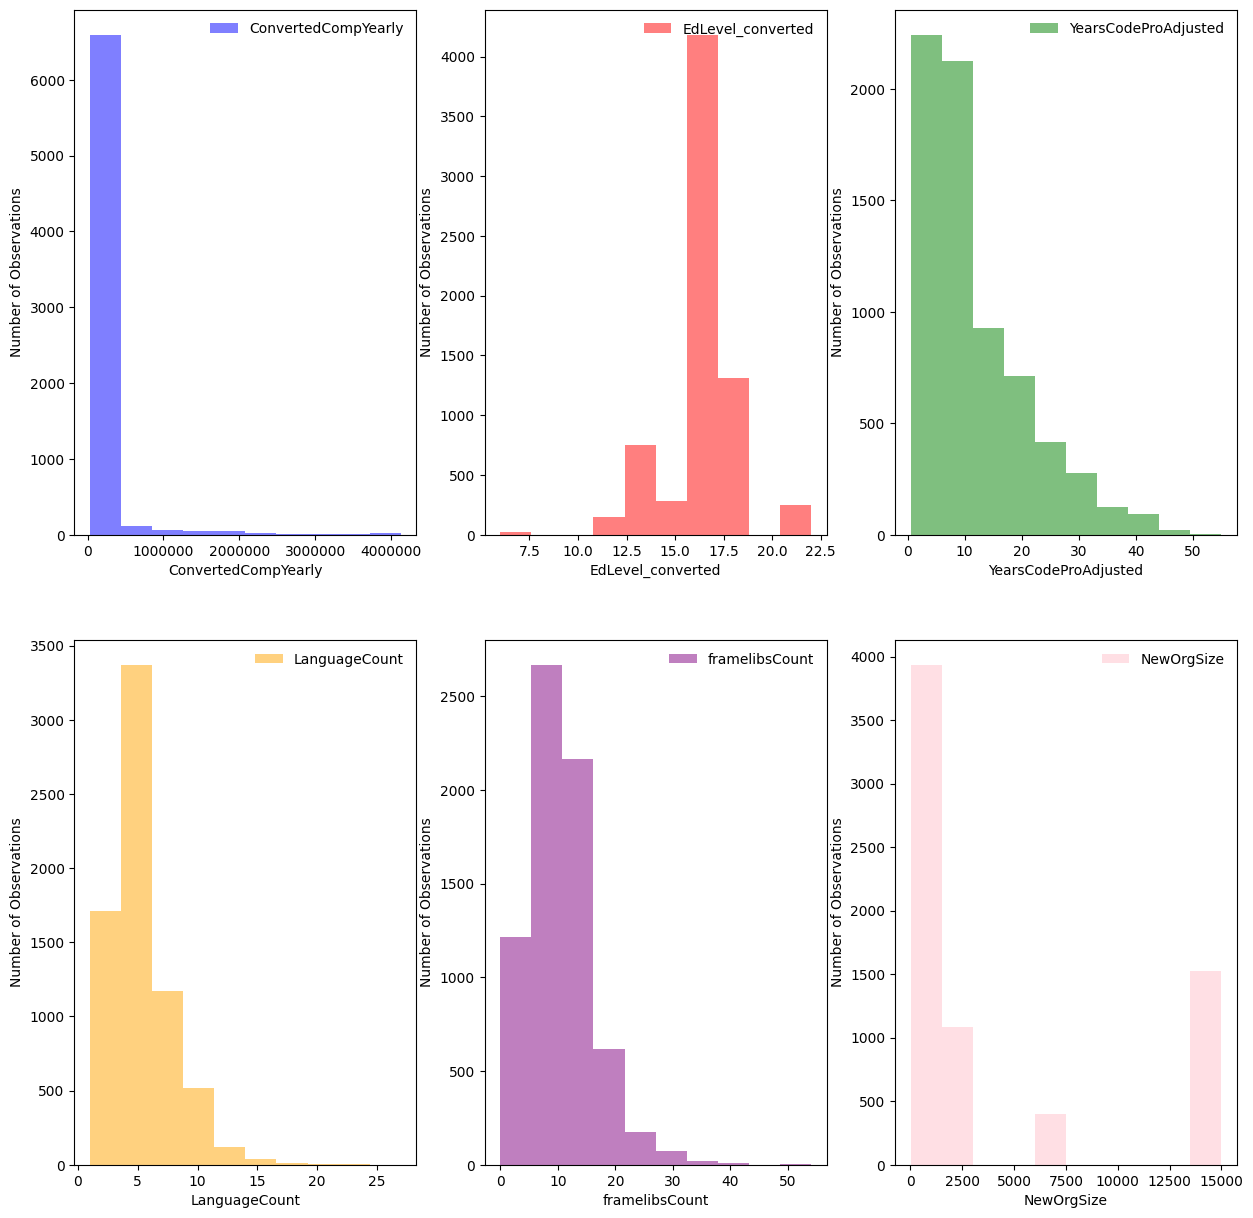

In [38]:
# 2x3 (rxc) plot
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
colors = ["blue", "red", "green", "orange", "purple", "pink"]

counter = 0 # for the colors list
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j] # get the subplot location

        ax.hist(
            us_prof_comp_data_mod1[us_prof_comp_data_mod1.columns[counter]],
            bins=10,
            color=colors[counter],
            alpha=0.5,
            label="{}".format(us_prof_comp_data_mod1.columns[counter]),
        )
        ax.set_xlabel(us_prof_comp_data_mod1.columns[counter])
        ax.set_ylabel("Number of Observations")
        ax.get_xaxis().get_major_formatter().set_scientific(False)
        leg = ax.legend(loc="upper right")
        leg.draw_frame(False)

        counter += 1
plt.show()


In [17]:
us_prof_comp_data_mod1.describe().apply(lambda s: s.apply(('{0:.5f}'.format)))

,ConvertedCompYearly,EdLevel_converted,YearsCodeProAdjusted,LanguageCount,framelibsCount,NewOrgSize
count,6943.00000,6943.00000,6943.00000,6943.00000,6943.00000,6943.00000
mean,216970.33415,16.07029,11.39738,5.29411,10.51664,4329.77272
std,362299.27033,1.94862,9.36185,2.58799,5.63580,5949.41178
min,30000.00000,6.00000,0.50000,1.00000,0.00000,5.00000
25%,106000.00000,16.00000,4.00000,4.00000,7.00000,59.00000
50%,145000.00000,16.00000,9.00000,5.00000,10.00000,749.00000
75%,195000.00000,16.00000,16.00000,7.00000,13.00000,7499.00000
max,4130000.00000,22.00000,55.00000,27.00000,54.00000,15000.00000



## III. Methodology/Empirical Model: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the model in this study, we are looking into the relationship between the following variables and their effect on total compensation: education level, years of professional coding experience, how many programming languages the respondent is fluent in, how large the organization is they work for, and the number of data frames, libraries and other technical tools respondents have worked on. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In most fields, education level does have a positive correlation with salary, as college graduates are often qualifying for higher paying jobs than high school graduates, master's degrees qualifying for higher paying jobs than a bachelor's degree, etc. The amount of experience someone has also is highly influential on determining salary because companies are willing to pay more for someone who knows what they are doing, as well as years of experience allowing individuals to climb the work ladder and earn higher paying positions. We are interested in looking at if there is a relationship between how many coding languages developers know and their salary, because the intuition would suggest that the more coding languages you are fluent in, the more jobs you qualify for and the more versatile an employee you are – thus earning you a higher wage. The same logic applies to the number of data frames, libraries, and other tools a developer has worked with – for there to be a positive relationship between the number of data frames and libraries with total salary. Finally, we are looking at the size of the organization a developer works for along with their total compensation because larger companies are more profitable than smaller organizations and can thus pay employees more. To answer this, we will use a multiple linear regression analysis as we are looking to determine if there are significant correlates for total compensation. The model we used is the following: 

$$ln(TotalCompensation) = \beta_0 + \beta_1 * EducationLevel + \beta_2 * ProfessionalCodingYears + \beta_3*LanguageCount$$
$$+ \beta_4*FrameworkLibrariesCount + \beta_5* OrganizationSize +u_i$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The OLS result is as below. Although the R^2 is not as high as we would like, the F-statistic shows that we are at least headed in the right direction. 

In [18]:
reg = smf.ols(formula= 'np.log(ConvertedCompYearly) ~ EdLevel_converted + YearsCodeProAdjusted + LanguageCount + framelibsCount + NewOrgSize', data= us_prof_comp_data)
result = reg.fit()

print(f'Regression results model 1: \n{result}\n')
result.summary()

Regression results model 1: 



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(ConvertedCompYearly)   R-squared:                       0.057
Model:                                     OLS   Adj. R-squared:                  0.056
Method:                          Least Squares   F-statistic:                     83.61
Date:                         Mon, 24 Oct 2022   Prob (F-statistic):           1.51e-85
Time:                                 20:05:30   Log-Likelihood:                -6572.6
No. Observations:                         6943   AIC:                         1.316e+04
Df Residuals:                             6937   BIC:                         1.320e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.2396      0.067    168.654      0.000      11.109      11.370
EdLevel_converted        0.0267      0.004      6.896      0.000       0.019       0.034
YearsCodeProAdjusted     0.0130      0.001     16.219      0.000       0.011       0.015
LanguageCount           -0.0022      0.004     -0.604      0.546      -0.009       0.005
framelibsCount           0.0086      0.002      5.196      0.000       0.005       0.012
NewOrgSize            1.156e-05   1.27e-06      9.127      0.000    9.08e-06     1.4e-05
==============================================================================
Omnibus:                     3251.038   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21254.382
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      10.404   Cond. No.                     6.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;